In [1]:
# Initial imports
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import explained_variance_score , mean_squared_error, r2_score

from numpy import arange
from numpy import mean
from numpy import std
from numpy import absolute

# from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# import psycopg2
# from config import password

In [2]:
# Read in the data from unsupervised
nfl_stats = pd.read_csv('unsupervised_df.csv')

In [3]:
# Show df
nfl_stats.head()

Unnamed: 0   Age   G1  GS1  Cmp1  Att1  Yds1  TD1  Int2   Att2  ...  2PP  \
0           0  27.0  8.0  8.0   1.0   1.0   5.0  1.0   0.0  219.0  ...  0.0   
1           1  28.0  9.0  9.0   0.0   0.0   0.0  0.0   0.0    1.0  ...  0.0   
2           2  22.0  9.0  9.0   0.0   0.0   0.0  0.0   0.0  140.0  ...  0.0   
3           3  25.0  9.0  9.0   0.0   0.0   0.0  0.0   0.0  150.0  ...  0.0   
4           4  21.0  9.0  9.0   0.0   0.0   0.0  0.0   0.0    4.0  ...  0.0   

   FantPt    PPR   DKPt   FDPt    VBD  PosRank  OvRank  Rating  Class  
0   175.0  193.3  199.3  184.3  104.0      1.0     1.0   31.85      1  
1   161.0  235.4  238.4  198.4   95.0      1.0     2.0   30.92      0  
2   163.0  186.4  193.4  174.9   92.0      2.0     3.0   34.58      1  
3   137.0  159.0  165.0  148.0   66.0      3.0     4.0   29.09      1  
4   124.0  168.2  172.2  146.2   58.0      2.0     5.0   22.59      0  

[5 rows x 32 columns]

In [5]:
# Define the features and exclude rating 
X = nfl_stats.drop(columns=["Rating", "Unnamed: 0", "G1", "PosRank"], axis=1)

In [6]:
# Define the target set as rating
y = nfl_stats[["Rating"]]
y.head()

Rating
0   31.85
1   30.92
2   34.58
3   29.09
4   22.59

In [7]:
# Prep data for ML model
# y = values we want to predict
y = np.array(nfl_stats["Rating"])

# Save list to use later
feature_list = list(X.columns)

# Convert to numpy array
X = np.array(X)

In [8]:
# Split Data into testing and training 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

print("--------------------------")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("--------------------------")
print("y_train mean:", round(np.mean(y_train),2))
print("--------------------------")
print("y_test mean:", round(np.mean(y_test),2))
print("--------------------------")

--------------------------
X_train shape: (67, 28)
X_test shape: (45, 28)
--------------------------
y_train mean: 19.12
--------------------------
y_test mean: 17.2
--------------------------


In [9]:
# ML model define
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# Define variables for grid
ratios = arange(0, 1, 0.01)
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]

grid=dict()
grid['alpha'] = alphas
grid['l1_ratio'] = ratios

# Define and perform search
# search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# Fit
# results = search.fit(X_train, y_train)

# Define and fit model
model = ElasticNetCV(l1_ratio=ratios, alphas=alphas, cv=cv, n_jobs=-1)
model.fit(X_train, y_train)

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 287.8678456636627, tolerance: 0.256264396
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 266.432023010002

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 287.7762973240991, tolerance: 0.28179668333333335
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 173.36881853391031, tolerance: 0.3001102733333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: UserWarning: Coordinate descent with alpha=0 may lead 

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 212.16064813610615, tolerance: 0.258317476
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 167.35323438416913, tolerance: 0.273155486
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 180.94391059035013, tolerance: 0.27284823333333336
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 143.9034342189919, tolerance: 0.3081274980327869
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 191.6932223617253, tolerance: 0.2952361085
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.p

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 195.23882736820124, tolerance: 0.2945124098333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 190.07111445596334, tolerance: 0.3017961301639344
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 186.71458968652007, tolerance: 0.28022558183333335
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_d

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 171.62537597378434, tolerance: 0.28467672400000005
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 167.55325042296542, tolerance: 0.3081274980327869
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 173.5821136506773, tolerance: 0.28467672400000005
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_d

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 185.69297443951297, tolerance: 0.283263782295082
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 178.67817139395692, tolerance: 0.26502005672131146
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.617457958547504, tolerance: 0.2945124098333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_des

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 186.4515312363326, tolerance: 0.256264396
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 176.5900104303561, tolerance: 0.28198460333333336
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 195.95980948750574, tolerance: 0.2952361085
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: 

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 171.32002062053246, tolerance: 0.283263782295082
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 168.5422925255179, tolerance: 0.26502005672131146
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 199.48741784701537, tolerance: 0.283263782295082
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_desc

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 180.63127507737076, tolerance: 0.2693337668852459
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 177.27246868555562, tolerance: 0.29158113999999996
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You m

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 183.07293054875387, tolerance: 0.26404521933333336
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 165.78509654133296, tolerance: 0.28179668333333335
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You 

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 176.38851965332265, tolerance: 0.29030355639344263
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 187.3589640009952, tolerance: 0.2693337668852459
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 163.24167414358828, tolerance: 0.3077940698333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_de

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 182.42665058462444, tolerance: 0.2818560744262295
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.263985867508268, tolerance: 0.3001102733333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.889950500444854, tolerance: 0.26404521933333336
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_des

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.060528006397078, tolerance: 0.27222528933333334
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.429244028124515, tolerance: 0.3077940698333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 188.27584481696837, tolerance: 0.258317476
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.68149120904377, tolerance: 0.27538548183333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 161.24769850200045, tolerance: 0.2818560744262295
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 130.73248274881357, tolerance: 0.27538548183333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_de

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.9643436327951918, tolerance: 0.27222528933333334
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 166.65567024596865, tolerance: 0.258317476
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 185.5700191060373, tolerance: 0.2955524818333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.p

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 156.59168791685624, tolerance: 0.2752653940983607
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 143.4230410397693, tolerance: 0.3081274980327869
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 208.26863136155933, tolerance: 0.2752653940983607
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_des

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 175.08554592883766, tolerance: 0.2945124098333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 183.65053431746986, tolerance: 0.28022558183333335
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You m

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 178.93250793205516, tolerance: 0.27284823333333336
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 150.86787231904162, tolerance: 0.2752653940983607
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 138.56457175304317, tolerance: 0.3081274980327869
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_d

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 187.12620363104787, tolerance: 0.3017961301639344
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 176.5473761713586, tolerance: 0.2945124098333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 139.25332088579364, tolerance: 0.28022558183333335
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_de

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 130.80116707137552, tolerance: 0.27284823333333336
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 146.86161085572078, tolerance: 0.28467672400000005
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 191.94462031100738, tolerance: 0.2952361085
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descen

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 176.57049459049836, tolerance: 0.2945124098333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0657860659820244, tolerance: 0.2955524818333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 175.66704341302287, tolerance: 0.2945124098333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_de

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 196.36181378390145, tolerance: 0.2752653940983607
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0293842211992228, tolerance: 0.2818560744262295
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You mi

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 198.45546984110246, tolerance: 0.2955524818333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 186.27250762142478, tolerance: 0.258317476
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 172.42328761881166, tolerance: 0.258317476
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: 

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 146.92036594473606, tolerance: 0.28467672400000005
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134.49699226501826, tolerance: 0.2752653940983607
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 145.24688912883056, tolerance: 0.28467672400000005
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 119.78115165414987, tolerance: 0.273155486
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 186.93422724100898, tolerance: 0.28022558183333335
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5190845614520754, tolerance: 0.2955524818333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 137.51800808560427, tolerance: 0.2818560744262295
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 196.43377166936548, tolerance: 0.2752653940983607
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.39386959750481765, tolerance: 0.27538548183333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 173.80667429440373, tolerance: 0.27222528933333334
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 166.73897602463705, tolerance: 0.273155486
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 171.72308971150412, tolerance: 0.27222528933333334
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 164.81712728702533, tolerance: 0.27538548183333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 143.34264063259252, tolerance: 0.3081274980327869
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You m

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 112.14643644121851, tolerance: 0.2693337668852459
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 160.5118258915336, tolerance: 0.3077940698333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You mig

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 164.41884957732825, tolerance: 0.27538548183333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 171.29838103877591, tolerance: 0.3001102733333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You m

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 169.09907152049436, tolerance: 0.27222528933333334
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 168.7732818342863, tolerance: 0.29030355639344263
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You m

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 150.54448373241794, tolerance: 0.30702852983333334
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 194.35445024857725, tolerance: 0.2715829593333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 199.95751739187764, tolerance: 0.28143086933333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 81.61567738572347, tolerance: 0.299519414
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 129.16648567596906, tolerance: 0.29158113999999996
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 175.54233393697257, tolerance: 0.299519414
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: 

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 120.39841679805687, tolerance: 0.2715829593333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 71.44901992295783, tolerance: 0.30702852983333334
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 164.2782371186892, tolerance: 0.30702852983333334
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_de

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 103.29042378844646, tolerance: 0.27379708983333334
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 165.63088081096265, tolerance: 0.299519414
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 177.504807609813, tolerance: 0.29158113999999996
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.p

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 192.73786080991243, tolerance: 0.28143086933333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 185.6393307878369, tolerance: 0.2715829593333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 191.92873337378137, tolerance: 0.28143086933333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_d

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 113.30370565085204, tolerance: 0.2952361085
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 176.2869037576748, tolerance: 0.27379708983333334
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 148.2784232323832, tolerance: 0.28198460333333336
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 190.71872492674137, tolerance: 0.3017961301639344
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 178.92636768844835, tolerance: 0.26502005672131146
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 184.8584746683962, tolerance: 0.283263782295082
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_des

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 144.1610877567714, tolerance: 0.28467672400000005
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 181.01973404249205, tolerance: 0.27284823333333336
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 111.6335007530307, tolerance: 0.3081274980327869
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_de

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 176.44010970089312, tolerance: 0.28022558183333335
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 86.73726796253493, tolerance: 0.273155486
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 187.0298588188628, tolerance: 0.28022558183333335
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.p

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 192.8750372708698, tolerance: 0.2752653940983607
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 179.68840751901806, tolerance: 0.27284823333333336
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 143.45262415064136, tolerance: 0.3081274980327869
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_de

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 168.43524165204744, tolerance: 0.258317476
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 175.51887530454968, tolerance: 0.27222528933333334
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 165.25640425465463, tolerance: 0.273155486
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527:

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 183.73651268967097, tolerance: 0.2818560744262295
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 165.87665226365107, tolerance: 0.27538548183333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You m

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 164.60324357941255, tolerance: 0.29030355639344263
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 129.34490308693256, tolerance: 0.2693337668852459
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 163.31753735586184, tolerance: 0.3077940698333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_d

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 152.82830983651286, tolerance: 0.28179668333333335
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 100.3399506331694, tolerance: 0.2715829593333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You mi

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 191.3026481554175, tolerance: 0.256264396
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 97.428702800715, tolerance: 0.2952361085
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 91.05256322124262, tolerance: 0.28198460333333336
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: Con

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 167.1075868595201, tolerance: 0.2945124098333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 188.11882655360526, tolerance: 0.283263782295082
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 187.6357791922952, tolerance: 0.3017961301639344
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_desce

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 191.08373846360652, tolerance: 0.2952361085
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 175.91003492341406, tolerance: 0.28198460333333336
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might w

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 182.22701340326725, tolerance: 0.28022558183333335
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 191.16836995931843, tolerance: 0.2955524818333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.144803466125268, tolerance: 0.258317476
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.p

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94.07563860081609, tolerance: 0.3001102733333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 154.84774501122183, tolerance: 0.27538548183333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 186.69504735760984, tolerance: 0.2818560744262295
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_de

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 174.3650440116795, tolerance: 0.27222528933333334
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 163.2984529017099, tolerance: 0.3077940698333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 181.10806103867984, tolerance: 0.2693337668852459
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_des

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 163.59903164432262, tolerance: 0.26404521933333336
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 145.9250194290908, tolerance: 0.30702852983333334
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 152.8204186002765, tolerance: 0.28179668333333335
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_d

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 169.5295178279789, tolerance: 0.299519414
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 132.69951719897443, tolerance: 0.27379708983333334
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might wan

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 168.1548177381057, tolerance: 0.283263782295082
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 80.1678899333192, tolerance: 0.26502005672131146
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 191.9522415600324, tolerance: 0.28143086933333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_desce

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 193.67214989686823, tolerance: 0.2952361085
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 177.26740651836022, tolerance: 0.28198460333333336
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 150.06508813152362, tolerance: 0.28467672400000005
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descen

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.9030167268350056, tolerance: 0.258317476
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 129.6245356757263, tolerance: 0.273155486
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 76.15979960054, tolerance: 0.2955524818333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: Conve

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 191.56593080912762, tolerance: 0.2752653940983607
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 186.72954708824346, tolerance: 0.2818560744262295
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You mi

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 172.22650902655332, tolerance: 0.27222528933333334
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 160.86515780611685, tolerance: 0.3077940698333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You m

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 171.33378515342247, tolerance: 0.3001102733333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 153.82810386428824, tolerance: 0.28179668333333335
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 167.26057080105576, tolerance: 0.26404521933333336
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 180.30471835977224, tolerance: 0.2693337668852459
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 167.72169401947258, tolerance: 0.29030355639344263
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You m

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 165.56701922273427, tolerance: 0.283263782295082
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 190.8724880196296, tolerance: 0.28143086933333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 142.88205332288612, tolerance: 0.26502005672131146
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_de

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 192.26397925178372, tolerance: 0.2952361085
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31.897974465325206, tolerance: 0.28467672400000005
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might w

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 174.85673954342838, tolerance: 0.2945124098333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 181.0532807999505, tolerance: 0.28022558183333335
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You mi

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 74.92943811463994, tolerance: 0.2818560744262295
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 143.60407199560981, tolerance: 0.3081274980327869
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 192.86619930521047, tolerance: 0.2752653940983607
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_des

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79.37515273635137, tolerance: 0.27222528933333334
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 188.62898821639675, tolerance: 0.2955524818333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 157.9305738746275, tolerance: 0.258317476
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 189.80661560554822, tolerance: 0.2818560744262295
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72.81582166223743, tolerance: 0.3001102733333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 165.19599291184812, tolerance: 0.27538548183333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_de

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 176.80058992184115, tolerance: 0.29030355639344263
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51.18620743573749, tolerance: 0.2693337668852459
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 161.21071701471374, tolerance: 0.3077940698333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_de

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66.73060761995961, tolerance: 0.2715829593333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 157.78268101481265, tolerance: 0.30702852983333334
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34.49493006283063, tolerance: 0.28143086933333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_de

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 189.34997412527215, tolerance: 0.256264396
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 160.9789104066682, tolerance: 0.299519414
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 177.16984615282854, tolerance: 0.29158113999999996
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: 

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 188.28335238637519, tolerance: 0.283263782295082
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 178.93739473323637, tolerance: 0.26502005672131146
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47.09974759285885, tolerance: 0.3017961301639344
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_des

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 176.3449427736206, tolerance: 0.28198460333333336
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 190.25823953528652, tolerance: 0.2952361085
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might wa

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 193.06785391319005, tolerance: 0.2955524818333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 153.19883663300516, tolerance: 0.258317476
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 126.97887869148542, tolerance: 0.273155486
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: 

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 165.53448873152794, tolerance: 0.27538548183333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 185.14601809758074, tolerance: 0.2818560744262295
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 143.40941148450426, tolerance: 0.3081274980327869
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_d

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43.858051372535755, tolerance: 0.2693337668852459
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 143.9792931631422, tolerance: 0.29030355639344263
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 110.76336374386061, tolerance: 0.2693337668852459
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_de

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27.891368321567143, tolerance: 0.28143086933333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 184.09823233266124, tolerance: 0.2715829593333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You m

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60.39270355047398, tolerance: 0.2952361085
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36.20147306958313, tolerance: 0.256264396
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 138.97691016729277, tolerance: 0.2952361085
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: Converg

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 191.3840294290922, tolerance: 0.28143086933333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 185.08471579491558, tolerance: 0.283263782295082
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 128.45213914872363, tolerance: 0.26502005672131146
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_de

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 138.7068904269647, tolerance: 0.2952361085
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.952587226000503, tolerance: 0.28467672400000005
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 175.96472442083268, tolerance: 0.28198460333333336
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 186.93636303889758, tolerance: 0.28022558183333335
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 178.68420107593045, tolerance: 0.2945124098333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 187.64897064306743, tolerance: 0.3017961301639344
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_d

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 143.51303635236198, tolerance: 0.3081274980327869
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 192.85182956312858, tolerance: 0.2752653940983607
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 147.4995675898254, tolerance: 0.28467672400000005
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_de

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62.94996464743832, tolerance: 0.27222528933333334
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 116.06714087557093, tolerance: 0.3077940698333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 139.02286892190665, tolerance: 0.29030355639344263
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_d

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 167.56912676936153, tolerance: 0.26404521933333336
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 153.7596560018261, tolerance: 0.28179668333333335
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You m

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 191.097660708743, tolerance: 0.256264396
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 176.32721484550615, tolerance: 0.27379708983333334
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 178.19629596094236, tolerance: 0.28198460333333336
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.p

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 186.3927096525042, tolerance: 0.3017961301639344
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 130.07921264442186, tolerance: 0.2945124098333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44.72881359454777, tolerance: 0.28022558183333335
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_des

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 147.5360348621502, tolerance: 0.28467672400000005
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 147.16549007394806, tolerance: 0.3081274980327869
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 191.2228582091575, tolerance: 0.2952361085
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.p

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 165.44648775405767, tolerance: 0.273155486
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 185.86119104372483, tolerance: 0.2955524818333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might wan

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 176.11079235496086, tolerance: 0.3001102733333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 164.53444342793944, tolerance: 0.27538548183333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46.73862545618766, tolerance: 0.28179668333333335
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_d

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 172.37099303221663, tolerance: 0.27222528933333334
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 163.18639655151236, tolerance: 0.3077940698333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 170.7073564965789, tolerance: 0.27222528933333334
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_d

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 163.95349990335808, tolerance: 0.26404521933333336
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 152.563

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 175.5933166272295, tolerance: 0.27379708983333334
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 178.69710491003093, tolerance: 0.29158113999999996
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 180.44658363721865, tolerance: 0.2693337668852459
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_d

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 156.0003440512881, tolerance: 0.283263782295082
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 192.0171633234539, tolerance: 0.28143086933333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 191.81829131449288, tolerance: 0.283263782295082
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_desce

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 176.0158678460598, tolerance: 0.28198460333333336
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 196.30967043094776, tolerance: 0.2952361085
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.18442222563999, tolerance: 0.27284823333333336
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32.48911660624714, tolerance: 0.3017961301639344
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 184.137299902608, tolerance: 0.283263782295082
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 142.36628007910386, tolerance: 0.3017961301639344
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descen

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 149.58957214284717, tolerance: 0.28467672400000005
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 116.93443591817908, tolerance: 0.27284823333333336
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 126.92190172292618, tolerance: 0.3081274980327869
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 190.8549477870546, tolerance: 0.2955524818333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 172.76547010280757, tolerance: 0.258317476
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 123.89841017788132, tolerance: 0.273155486
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: C

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 192.8434380757979, tolerance: 0.2752653940983607
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 164.12647969227538, tolerance: 0.27538548183333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 143.40055272316823, tolerance: 0.3081274980327869
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_de

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 160.59807571997771, tolerance: 0.3077940698333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27.964264932084347, tolerance: 0.2693337668852459
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 128.33699468535002, tolerance: 0.29030355639344263
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_d

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 96.84795447585594, tolerance: 0.30702852983333334
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 107.00195259106144, tolerance: 0.28179668333333335
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 150.37563859683758, tolerance: 0.30702852983333334
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 177.85487443529436, tolerance: 0.29158113999999996
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 180.21253761935714, tolerance: 0.2693337668852459
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: UserWarning: Coordinate descent with alpha=0 may lead

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 186.18536312540746, tolerance: 0.2715829593333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 191.7810044870479, tolerance: 0.283263782295082
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36.67361826996557, tolerance: 0.26502005672131146
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_desc

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 175.47075781577556, tolerance: 0.27379708983333334
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 176.9104761887045, tolerance: 0.28198460333333336
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You m

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 184.78571289378624, tolerance: 0.3017961301639344
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 143.86285595590093, tolerance: 0.28022558183333335
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 174.88385599164212, tolerance: 0.2945124098333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_d

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 179.27711833424746, tolerance: 0.27284823333333336
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 143.41436580355764, tolerance: 0.3081274980327869
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 144.43998458158512, tolerance: 0.28467672400000005
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 116.83448436775473, tolerance: 0.3077940698333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 129.73369794682625, tolerance: 0.27222528933333334
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 176.9311736905885, tolerance: 0.27222528933333334
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_d

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 170.4239943543057, tolerance: 0.26404521933333336
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 171.4476211278993, tolerance: 0.3001102733333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 164.28440658341333, tolerance: 0.27538548183333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_de

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 172.47626974115744, tolerance: 0.27222528933333334
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 171.2367270531066, tolerance: 0.29030355639344263
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 160.91045414276908, tolerance: 0.3077940698333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_d

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 165.1391021538801, tolerance: 0.27538548183333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 167.07340430645172, tolerance: 0.26404521933333336
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 130.77488041308044, tolerance: 0.3001102733333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_d

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 121.02151702246461, tolerance: 0.29030355639344263
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 112.64685979680795, tolerance: 0.2693337668852459
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 160.9120734242641, tolerance: 0.3077940698333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_de

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 153.72016034370245, tolerance: 0.28179668333333335
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 167.71476074992162, tolerance: 0.26404521933333336
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 88.98391475639059, tolerance: 0.30702852983333334
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 159.39339282801666, tolerance: 0.299519414
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 177.87770118958213, tolerance: 0.29158113999999996
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 135.7830688681636, tolerance: 0.27379708983333334
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 191.7426918481114, tolerance: 0.283263782295082
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30.220128323191886, tolerance: 0.26502005672131146
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 191.47499915001816, tolerance: 0.28143086933333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_de

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 196.40585600143862, tolerance: 0.2952361085
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 176.9406903930872, tolerance: 0.28198460333333336
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 146.69669966655496, tolerance: 0.28467672400000005
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 184.02790881790636, tolerance: 0.28022558183333335
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 170.23464249247203, tolerance: 0.273155486
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might wa

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 143.38254884416347, tolerance: 0.3081274980327869
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 186.8537679526987, tolerance: 0.2818560744262295
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 165.55804122701772, tolerance: 0.27538548183333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_de

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 160.91803370891117, tolerance: 0.3077940698333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.05582532577847, tolerance: 0.2693337668852459
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.49214365131319937, tolerance: 0.29030355639344263
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_d

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 146.3200957136477, tolerance: 0.30702852983333334
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 152.85291185457785, tolerance: 0.28179668333333335
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You m

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 161.30198559886392, tolerance: 0.299519414
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 178.5130249621046, tolerance: 0.256264396
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to inc

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.74397902525118, tolerance: 0.3017961301639344
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 185.3387928828951, tolerance: 0.283263782295082
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: UserWarning: Coordinate descent with alpha=0 may lead to 

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 191.38031624990225, tolerance: 0.2952361085
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1181821107605288, tolerance: 0.28467672400000005
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might w

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 122.2718975973889, tolerance: 0.2945124098333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 121.64518955600857, tolerance: 0.273155486
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 187.17330753830143, tolerance: 0.28022558183333335
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.p

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 182.11377115585893, tolerance: 0.27284823333333336
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 155.93582670788294, tolerance: 0.28467672400000005
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.05884321143958, tolerance: 0.2752653940983607
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_de

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 174.90828113644102, tolerance: 0.2945124098333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 187.13697523398304, tolerance: 0.28022558183333335
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.927983041794448, tolerance: 0.2955524818333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_d

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 191.39874610992888, tolerance: 0.2952361085
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 145.90565610752498, tolerance: 0.28467672400000005
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might w

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 165.59729850643907, tolerance: 0.273155486
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 185.91834406260432, tolerance: 0.2955524818333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6763677626434514, tolerance: 0.258317476
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: 

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 149.55416299640456, tolerance: 0.26404521933333336
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 165.5466701862594, tolerance: 0.27538548183333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 165.16202226771514, tolerance: 0.27538548183333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 168.00029514929838, tolerance: 0.29030355639344263
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 182.88773550072347, tolerance: 0.29158113999999996
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 180.38810097944497, tolerance: 0.2693337668852459
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.95153521513879, tolerance: 0.28143086933333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 122.8587566054193, tolerance: 0.2715829593333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You migh

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 159.49905722745098, tolerance: 0.299519414
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 176.64916814502524, tolerance: 0.27379708983333334
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 191.02098994558975, tolerance: 0.256264396
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527:

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 191.58786426011238, tolerance: 0.283263782295082
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 181.6711355490579, tolerance: 0.2715829593333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 122.34390017327246, tolerance: 0.26502005672131146
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_des

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 142.02118956400295, tolerance: 0.28467672400000005
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 190.4736263610348, tolerance: 0.2952361085
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 87.74719894974284, tolerance: 0.27284823333333336
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 186.67151964371334, tolerance: 0.2955524818333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 174.9342066745403, tolerance: 0.2945124098333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You mig

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 167.8134379150528, tolerance: 0.26404521933333336
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 158.13442023939857, tolerance: 0.28179668333333335
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 172.14816379467345, tolerance: 0.3001102733333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_d

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 182.91796828948802, tolerance: 0.29158113999999996
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 180.4021066272761, tolerance: 0.2693337668852459
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.557756413502375, tolerance: 0.27379708983333334
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_d

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9353174420722326, tolerance: 0.283263782295082
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 181.69105559821583, tolerance: 0.2715829593333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 191.02896928859082, tolerance: 0.28143086933333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_de

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.31893276116284, tolerance: 0.2952361085
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 140.69090160776892, tolerance: 0.28467672400000005
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.1572583914403936, tolerance: 0.27284823333333336
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 178.62646327263928, tolerance: 0.26502005672131146
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 176.03518170983259, tolerance: 0.2945124098333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 186.58262481853436, tolerance: 0.3017961301639344
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_d

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 196.81497472673445, tolerance: 0.2752653940983607
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 184.02679075540414, tolerance: 0.27284823333333336
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 181.801057617339, tolerance: 0.27284823333333336
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_de

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.936644135275174, tolerance: 0.3077940698333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 172.96431446564586, tolerance: 0.258317476
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 130.1502492627408, tolerance: 0.3077940698333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 184.1361715324952, tolerance: 0.2818560744262295
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 164.72429162759857, tolerance: 0.27538548183333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 173.69215604073725, tolerance: 0.3001102733333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_de

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 168.05220154003428, tolerance: 0.29030355639344263
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.260135322582016, tolerance: 0.29158113999999996
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 180.20558013179166, tolerance: 0.2693337668852459
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 146.85009927898648, tolerance: 0.30702852983333334
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6513607684301519, tolerance: 0.28143086933333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 152.8847298702464, tolerance: 0.28179668333333335
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 177.36212364985087, tolerance: 0.28198460333333336
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 191.04064116495744, tolerance: 0.256264396
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 175.5454615667369, tolerance: 0.27379708983333334
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 121.96502075519756, tolerance: 0.2945124098333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 187.7743456234449, tolerance: 0.3017961301639344
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 178.89692724978238, tolerance: 0.26502005672131146
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_de

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31.966232859527906, tolerance: 0.3081274980327869
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 144.55974696683006, tolerance: 0.28467672400000005
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 184.08512679164113, tolerance: 0.27284823333333336
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 188.805012133519, tolerance: 0.2955524818333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 180.35934802094562, tolerance: 0.28022558183333335
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 167.5274526651364, tolerance: 0.273155486
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 176.1372468409974, tolerance: 0.3001102733333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 191.6775854108043, tolerance: 0.2752653940983607
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You migh

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 160.91967845074913, tolerance: 0.3077940698333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.761711033088261, tolerance: 0.29030355639344263
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.274333645847719, tolerance: 0.2693337668852459
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_des

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 186.5173826915993, tolerance: 0.2715829593333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 164.1113968079835, tolerance: 0.26404521933333336
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 146.41783587628638, tolerance: 0.30702852983333334
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_de

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 191.05974695208414, tolerance: 0.256264396
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 161.56202440483656, tolerance: 0.299519414
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.389136797699848, tolerance: 0.28198460333333336
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527:

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 191.61181605719094, tolerance: 0.28143086933333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 178.6567999389065, tolerance: 0.26502005672131146
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: UserWarning: Coordinate descent with alpha=0 may lead

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29.08138307408103, tolerance: 0.3081274980327869
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8523654461036472, tolerance: 0.28467672400000005
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 191.56616757803616, tolerance: 0.2952361085
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 180.39105979987517, tolerance: 0.28022558183333335
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 175.0055501371089, tolerance: 0.2945124098333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You mi

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.389383153538688, tolerance: 0.26404521933333336
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.21404047989165, tolerance: 0.27538548183333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.35239493793744714, tolerance: 0.28179668333333335
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_d

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 173.69521142521364, tolerance: 0.29030355639344263
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 161.10297186634267, tolerance: 0.3077940698333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23.369428125335673, tolerance: 0.29158113999999996
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 146.85999824100148, tolerance: 0.30702852983333334
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 164.12084440457147, tolerance: 0.26404521933333336
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 152.90374185395652, tolerance: 0.28179668333333335
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.145278260021598, tolerance: 0.27379708983333334
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 159.6933738486632, tolerance: 0.299519414
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.812215375641756, tolerance: 0.256264396
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: C

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 186.93275739074966, tolerance: 0.283263782295082
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 178.90159057817996, tolerance: 0.26502005672131146
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You mi

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 147.96408678443876, tolerance: 0.28467672400000005
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 93.98576854440854, tolerance: 0.27284823333333336
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 184.21208613101837, tolerance: 0.27284823333333336
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 184.95649589499772, tolerance: 0.3017961301639344
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 176.16738663094625, tolerance: 0.2945124098333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 181.43259628581174, tolerance: 0.28022558183333335
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_d

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 126.70174006010514, tolerance: 0.27538548183333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 115.96494848276251, tolerance: 0.2752653940983607
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 189.87597572779208, tolerance: 0.2818560744262295
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_d

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.31241486206511127, tolerance: 0.29030355639344263
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3305831778653783, tolerance: 0.3077940698333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You 

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.45730232508361723, tolerance: 0.30702852983333334
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5156341487562486, tolerance: 0.28179668333333335
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 146.48773950689235, tolerance: 0.26404521933333336
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinat

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 180.3132138404003, tolerance: 0.2693337668852459
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.594004313709547, tolerance: 0.27379708983333334
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.371239192711073, tolerance: 0.256264396
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 192.28294290187986, tolerance: 0.28143086933333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 181.80805055702785, tolerance: 0.2715829593333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 178.91148100708023, tolerance: 0.26502005672131146
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 177.10939433386778, tolerance: 0.28198460333333336
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3794742887326379, tolerance: 0.28467672400000005
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 190.65586142551, tolerance: 0.2952361085
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.p

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 170.8136310024157, tolerance: 0.273155486
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 184.45750145525517, tolerance: 0.28022558183333335
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 176.19757196805713, tolerance: 0.2945124098333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.p

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 180.2005956104573, tolerance: 0.27284823333333336
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 148.02305610301735, tolerance: 0.28467672400000005
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 192.1670450440303, tolerance: 0.2752653940983607
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_de

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 167.05147071367387, tolerance: 0.258317476
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 128.30269930349328, tolerance: 0.27222528933333334
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might wa

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 164.7858182333076, tolerance: 0.27538548183333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 152.93422409834656, tolerance: 0.28179668333333335
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You m

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 115.6392110186118, tolerance: 0.2693337668852459
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 160.80300246048537, tolerance: 0.3077940698333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5067875854499562, tolerance: 0.29158113999999996
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_de

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 164.14203900433722, tolerance: 0.26404521933333336
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 152.93901807924067, tolerance: 0.28179668333333335
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 146.4746331562139, tolerance: 0.30702852983333334
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 175.18029913287273, tolerance: 0.27379708983333334
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 191.4671820581862, tolerance: 0.256264396
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.61142748900835, tolerance: 0.28198460333333336
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 178.7361212441174, tolerance: 0.26502005672131146
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 176.22049749720517, tolerance: 0.2945124098333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 182.85854297650377, tolerance: 0.28022558183333335
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_d

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 189.92780051242767, tolerance: 0.2818560744262295
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 143.3042555013559, tolerance: 0.3081274980327869
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.64705931202684, tolerance: 0.27538548183333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_desc

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 186.05710402707518, tolerance: 0.2955524818333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 167.06135263412312, tolerance: 0.258317476
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 172.95955974793964, tolerance: 0.27222528933333334
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 170.59748612846187, tolerance: 0.26404521933333336
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.198926292579188, tolerance: 0.28179668333333335
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.292483503399183, tolerance: 0.2715829593333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_d

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 180.09557513183404, tolerance: 0.29158113999999996
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 168.2028041939002, tolerance: 0.29030355639344263
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 180.14625431194776, tolerance: 0.2693337668852459
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_d

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 192.31683976257466, tolerance: 0.28143086933333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.070868587175653, tolerance: 0.26502005672131146
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 191.68308580520127, tolerance: 0.28143086933333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 190.75137295278637, tolerance: 0.2952361085
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 86.34606271343

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.31084315802416995, tolerance: 0.258317476
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 182.91831369733248, tolerance: 0.28022558183333335
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 188.9769916213462, tolerance: 0.2955524818333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 187.33656051730873, tolerance: 0.2818560744262295
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 192.19775700544417, tolerance: 0.2752653940983607
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 177.90768655663373, tolerance: 0.3001102733333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_de

C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 169.81216533094175, tolerance: 0.27222528933333334
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 173.9000363369092, tolerance: 0.29030355639344263
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 160.82982425880175, tolerance: 0.3077940698333333
  tol, rng, random, positive)
C:\Users\joela\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_d

ElasticNetCV(alphas=[1e-05, 0.0001, 0.001, 0.01, 0.1, 0.0, 1.0, 10.0, 100.0],
             cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
             l1_ratio=array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99]),
             n_jobs=-1)

In [10]:
# Summarize
print('alpha: %f' % model.alpha_)
print('l1_ratio_: %f' % model.l1_ratio_)

alpha: 100.000000
l1_ratio_: 0.000000


In [11]:
# Predict
y_pred = model.predict(X_test)

In [12]:
# Evaluate performance
# MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
print(f'Mean squared error: {round(mse,2)}')

rmse = np.sqrt(mse)
print(f'RMSE: {round(rmse,2)}')

# Coefficient of Determination (should match explained variance)
print(f'Coefficient of Determination: {round(r2_score(y_test, y_pred),2)}')

# Calculate the absolute errors
error = abs(y_pred - y_test)

# Print mean absolute error
print(f'Mean Absolute Error: {round(np.mean(error),2)}')

Mean squared error: 10.63
RMSE: 3.26
Coefficient of Determination: 0.71
Mean Absolute Error: 2.58


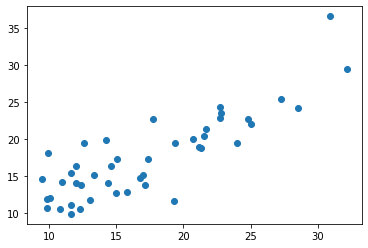

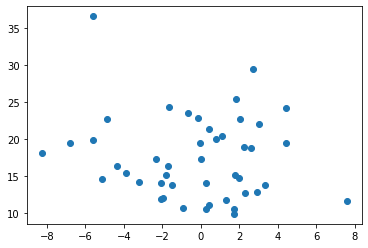

In [13]:
# Plot predicted vs true and residuals vs predicted
residuals = y_test - y_pred
plt.scatter(y_test,y_pred)
plt.show()

residuals = y_test - y_pred
plt.scatter(residuals,y_pred)
plt.show()

28 features, reduction of 0.00%


<AxesSubplot:>

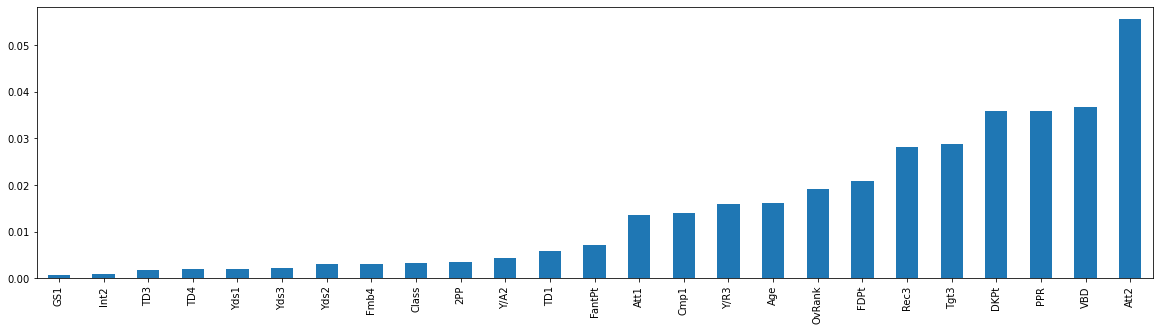

In [14]:
# Define columns list
columns_list = nfl_stats.drop(columns=["Rating", "Unnamed: 0", "G1", "PosRank"], axis=1)

# Create series for plot
feature_importance = pd.Series(index = columns_list.columns, data = np.abs(model.coef_))

# Print features
selected_features = (feature_importance > 0).sum()
print('{0:d} features, reduction of {1:2.2f}%'.format(selected_features,(1-selected_features/len(feature_importance))*100))

# Sort and define type of chart and size
feature_importance.sort_values().tail(25).plot(kind = 'bar', figsize = (20,5))